# High school SAT scores in New York City 


## Introduction :

- One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

- The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

- The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

- Here are the links to all of the data sets we'll be using:

    - SAT scores by school - SAT scores for each high school in New York City : sat_results.csv.
    - School attendance - Attendance information for each school in New York City : hs_directory.csv.
    - Class size - Information on class size for each school : class_size.csv.
    - AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject) : ap_2010.csv.
    - Graduation outcomes - The percentage of students who graduated, and other outcome information : graduation.csv.
    - Demographics - Demographic information for each school : demographics.csv.
    - School survey - Surveys of parents, teachers, and students at each school : survey_all.txt, survey_d75.txt.


- All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

## Reading in each file into pandas dataframe :

- Let's first, read the CSV files only :

In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for f in data_files :
    df = pd.read_csv(f)
    key_name = f.replace(".csv","")
    data[key_name] = df

## Exploring the Data sets and preparing them to merge (Cleaning):

In [2]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


- The DBN appears to be a unique ID for each school.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.


In [3]:
data["sat_results"]["SAT Math Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"], errors="coerce")
data["sat_results"]["SAT Critical Reading Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"], errors="coerce")
data["sat_results"]["SAT Writing Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"], errors="coerce")
data["sat_results"]["sat_score"] = data["sat_results"]["SAT Math Avg. Score"] + data["sat_results"]["SAT Critical Reading Avg. Score"] + data["sat_results"]["SAT Writing Avg. Score"]
data["sat_results"]["sat_score"].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

In [4]:
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


- The Data set above have a DBN column.

In [5]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


- The DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data.

In [6]:
def func(n):
    if len(str(n)) == 2 :
        return str(n)
    if len(str(n)) == 1 :
        return str(n).zfill(2)
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(func)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [7]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


- The Data set above have a DBN column.
- The Data set above appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set

In [8]:
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


- The Data set above have a DBN column.
- The Data set above appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set

In [9]:
data["hs_directory"].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9.0,14.0,...,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",1.0,1.0,29.0,1001388.0,1.001130e+09,Chinatown ...
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"160 20 Goethals Avenue\nJamaica, NY 11432\n(40...",8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...


- The Data set above have a DBN column named dbn(we will need to change the name of the column 'dbn'). 
- We can extract coordinates from the Location 1 column which contains a large String.

In [10]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [11]:
import re
def func(s):
    s = re.findall("\(.+\)", s)
    s = s[0].replace('(',"").replace(')',"")
    return s
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(func).str.split(',').str.get(0)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(func).str.split(',').str.get(1)
data["hs_directory"].head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548,40.67029890700047,-73.96164787599963
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543,40.8276026690005,-73.90447525699966
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,09X327,40.842414068000494,-73.91616158599965
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9.0,14.0,...,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",1.0,1.0,29.0,1001388.0,1.001130e+09,Chinatown ...,02M280,40.71067947100045,-74.00080702099967
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,"160 20 Goethals Avenue\nJamaica, NY 11432\n(40...",8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...,28Q680,40.718810094000446,-73.80650045499965


## Reading 'survey_all.txt' and 'survey_d75.txt' into dataframes, then combining them into a single dataframe :

In [12]:
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding="windows-1252")
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding="windows-1252")
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

C:\Users\Cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


- There are over 2000 columns, We'll have to filter the data to remove the unnecessary ones, We have a data dictionary in a file named 'survey_dictionary.png' that tells us what each column represents.
- The survey data has a 'bn' column that represents an id for each school, we'll want to rename it to 'DBN'.

## Cleaning The survey Data set :

- Let's rename the 'bn' column to 'DBN', Then remove the unnecessary columns.

In [13]:
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
data["survey"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 55
Data columns (total 23 columns):
DBN           1702 non-null object
rr_s          1041 non-null float64
rr_t          1702 non-null int64
rr_p          1702 non-null int64
N_s           1036 non-null float64
N_t           1700 non-null float64
N_p           1696 non-null float64
saf_p_11      1696 non-null float64
com_p_11      1696 non-null float64
eng_p_11      1696 non-null float64
aca_p_11      1696 non-null float64
saf_t_11      1700 non-null float64
com_t_11      1700 non-null float64
eng_t_11      1700 non-null float64
aca_t_11      1700 non-null float64
saf_s_11      1036 non-null float64
com_s_11      1036 non-null float64
eng_s_11      1036 non-null float64
aca_s_11      1036 non-null float64
saf_tot_11    1702 non-null float64
com_tot_11    1702 non-null float64
eng_tot_11    1702 non-null float64
aca_tot_11    1702 non-null float64
dtypes: float64(20), int64(2), object(1)
memory usage: 319.1+ KB


## Combining the Data sets :

- Data sets like class_size, graduation, and demographics had duplicate DBN values, we'll condense them so that each DBN is unique.

### The class_size column :

In [14]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


- The first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE.

In [15]:
data['class_size'].tail()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN,32,32K564
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN,32,32K564
27610,32,K,K564,Bushwick Community High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1,32,32K564


- From the last few rows we can see that each school has multiple values for CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

In [16]:
data['class_size']['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

- Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

In [17]:
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

In [18]:
class_size = data["class_size"]
class_size = class_size.loc[class_size["GRADE "]=="09-12"]

In [19]:
data['class_size']['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

- Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED

In [20]:
class_size = class_size.loc[class_size["PROGRAM TYPE"]=="GEN ED"]
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [21]:
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

- This column only seems to include certain subjects. We want our class size data to include every single class a school offers. We can take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average.
- let's perform a grouping on the 'DBN' column, then we can compute the averages for the AVERAGE CLASS SIZE column in each of the four groups using the agg() method.

In [22]:
import numpy as np
class_size = class_size.groupby(class_size["DBN"])
class_size = class_size.agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [23]:
data['class_size']['SCHOOLWIDE PUPIL-TEACHER RATIO'].unique()

array([nan])

- The 'SCHOOLWIDE PUPIL-TEACHER RATIO' column contains only null values, let's remove it.

In [24]:
cols = ['DBN', 'CSD', 'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS']
data["class_size"] = data["class_size"].loc[:,cols]
data["class_size"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
DBN                                  583 non-null object
CSD                                  583 non-null int64
NUMBER OF STUDENTS / SEATS FILLED    583 non-null float64
NUMBER OF SECTIONS                   583 non-null float64
AVERAGE CLASS SIZE                   583 non-null float64
SIZE OF SMALLEST CLASS               583 non-null float64
SIZE OF LARGEST CLASS                583 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 32.0+ KB


### The demographics column :

In [25]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


- In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

In [26]:
demographics = data["demographics"]
demographics = demographics.loc[demographics["schoolyear"]==20112012]
data["demographics"] = demographics
data["demographics"]

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9
42,01M064,PS 064 ROBERT SIMON,20112012,NaN,76.9,324,27,54,50,42,...,76,23.5,193,59.6,24,7.4,184.0,56.8,140.0,43.2
49,01M110,PS 110 FLORENCE NIGHTINGALE,20112012,NaN,52.5,440,34,67,75,65,...,58,13.2,194,44.1,124,28.2,219.0,49.8,221.0,50.2
56,01M134,PS 134 HENRIETTA SZOLD,20112012,NaN,84.1,369,36,67,57,55,...,74,20.1,181,49.1,8,2.2,177.0,48.0,192.0,52.0
63,01M137,PS 137 JOHN L BERNSTEIN,20112012,NaN,82.2,230,18,43,43,39,...,57,24.8,123,53.5,7,3.0,111.0,48.3,119.0,51.7
70,01M140,PS 140 NATHAN STRAUS,20112012,NaN,82.1,407,16,37,35,39,...,66,16.2,317,77.9,7,1.7,216.0,53.1,191.0,46.9


### The graduation column :

In [27]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


- A Cohort appears to refer to the year the data represents, let's pick data from the most recent Cohort available, which is 2006.

In [28]:
data["graduation"] = data["graduation"].loc[data["graduation"]["Cohort"]=="2006"]
data["graduation"]['DBN'].value_counts().head()

32K564    13
29Q496    12
30Q501    12
29Q498    12
31R460    12
Name: DBN, dtype: int64

In [29]:
data["graduation"].loc[data["graduation"]['DBN']=='32K564'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
2509,Total Cohort,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,128,10,7.8,3,2.3,30.0,...,3,2.3,30.0,7,5.5,70.0,63,49.2,52,40.6
4550,English Language Learners,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,2,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
7043,English Proficient Students,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,126,10,7.9,3,2.4,30.0,...,3,2.4,30.0,7,5.6,70.0,63,50.0,50,39.7
9245,Special Education Students,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,17,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
9503,Special Education Students,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,126,10,7.9,3,2.4,30.0,...,3,2.4,30.0,7,5.6,70.0,63,50.0,50,39.7


- The Demographic column prevent DBN to be unique, It appears to refer to a specific demographic group, We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

In [30]:
data["graduation"] = data["graduation"].loc[data["graduation"]["Demographic"]=="Total Cohort"]
data["graduation"]['DBN'].value_counts().head()

24Q299    1
12X680    1
13K605    1
06M552    1
19K618    1
Name: DBN, dtype: int64

## Converting the Advanced Placement (AP) test scores from strings to numeric values:

In [31]:
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [32]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for column in cols :
    data["ap_2010"][column] = pd.to_numeric(data["ap_2010"][column], errors="coerce")
print(data["ap_2010"][column].dtypes)

float64


## Merging our DATA Sets :

- We'll be using the DBN column to identify matching rows across data sets, we may not find matches for the DBN values in sat_results in all of the other data sets, and other data sets may have DBN values that don't exist in sat_results.
- Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results.
- let's explore the DBN column in each Data set. 

In [33]:
for key, value in data.items() :
    print(key,'\n',data[key]['DBN'].shape)

ap_2010 
 (258,)
class_size 
 (583,)
demographics 
 (1509,)
graduation 
 (405,)
hs_directory 
 (435,)
sat_results 
 (478,)
survey 
 (1702,)


- We'll merge two data sets at a time starting with the sat_results column.
- for the ap_2010 and graduation a left join is more appropriate, because they have a lot of missing DBN values and because we don't want to lose too many rows when we merge.
- demographics, class_size, hs_directory and survey Data sets contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type to avoid missing data in these columns.

In [34]:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], how="left", on='DBN')
combined = combined.merge(data["graduation"], how="left", on='DBN')
print(combined.shape)
combined.head()


(479, 33)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0


In [35]:
combined = combined.merge(data["class_size"], how="inner", on='DBN')
combined.shape

(435, 39)

In [36]:
combined = combined.merge(data["demographics"], how="inner", on='DBN')
combined.shape

(435, 76)

In [37]:
combined = combined.merge(data["survey"], how="inner", on='DBN')
combined.shape

(435, 98)

In [38]:
combined = combined.merge(data["hs_directory"], how="inner", on='DBN')
combined.shape

(363, 164)

- You may have noticed that the inner joins resulted in 116 fewer rows in sat_results. This is because pandas couldn't find the DBN values that existed in sat_results in the other data sets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

## Filling the missing values :

In [39]:
combined.isnull().sum()

DBN                                       0
SCHOOL NAME                               0
Num of SAT Test Takers                    0
SAT Critical Reading Avg. Score          28
SAT Math Avg. Score                      28
SAT Writing Avg. Score                   28
sat_score                                28
SchoolName                              135
AP Test Takers                          155
Total Exams Taken                       155
Number of Exams with scores 3 4 or 5    223
Demographic                              53
School Name                              53
Cohort                                   53
Total Cohort                             53
Total Grads - n                          53
Total Grads - % of cohort                71
Total Regents - n                        53
Total Regents - % of cohort              71
Total Regents - % of grads               72
Advanced Regents - n                     53
Advanced Regents - % of cohort           71
Advanced Regents - % of grads   

In [40]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined.head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.71376394700047,-73.98526003999967
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.7123318510005,-73.98479662499966
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729782687000466,-73.98304144099967
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569079000484,-73.98567269099965
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725451000466,-73.97942638599966


## Analyzing and Visualizing the Data

- The first thing we'll do is find any correlations between any of the columns and sat_score. This will help us determine which columns might be interesting to plot out or investigate further.

In [41]:
correlations = combined.corr()
correlations = correlations.loc["sat_score"]
correlations 

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
Total Grads - % of cohort               0.584234
Total Regents - % of cohort             0.667603
Total Regents - % of grads              0.494732
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Regents w/o Advanced - % of cohort     -0.138188
Regents w/o Advanced - % of grads      -0.456213
Local - % of cohort                    -0.467951
Local - % of grads                     -0.494732
Still Enrolled - % of cohort           -0.491914
Dropped Out - % of cohort              -0.458537
CSD                                     0.042948
NUMBER OF STUDENTS /

## Plotting survey correlations

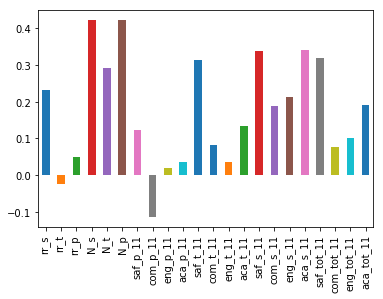

In [42]:
survey_fields.remove("DBN")
%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar()

- There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

- It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

- How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.

- The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

### Exploring saftey scores :

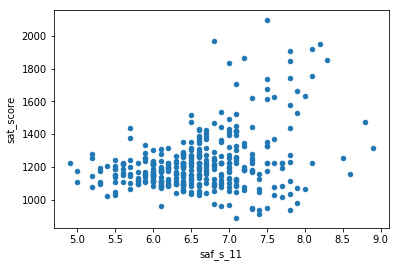

In [43]:
combined.plot.scatter("saf_s_11", "sat_score")

- we can see a positive correlation between saftey scores and sat scores but not a strong one.
- All school having sat score higher than 1600 have a safetey score higher than 6.5 but the oposit is not true because we can find some schools with saftey scores higher than 7 but sat score lower than 1000. 

## Exploring racial differences 

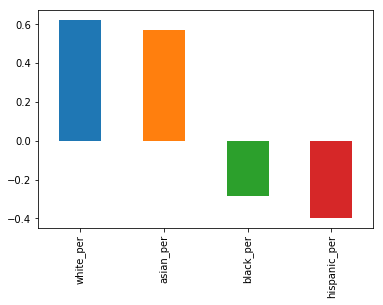

In [44]:
racial_per = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()["sat_score"][racial_per].plot.bar()

- We can see a positive correlation between sat score and School with high percentage of white and asian students, and negative correlation between sat score and school with high percentage of black and hispanic students.

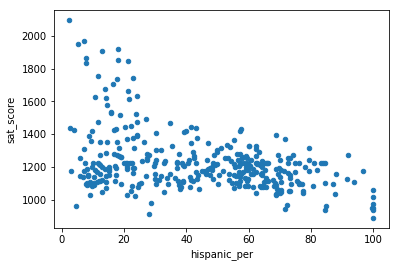

In [45]:
combined.plot.scatter("hispanic_per", "sat_score")

- We can confirm the negative correlation between sat score and school with high percentage of hispanic students, but not a strong one.
- It seems that schools with sat score higher than 1500 have less than 25% of hispanic students.
- We can also notice that schools with 100% hispanic students have sat score lower than 1100. 

In [46]:
print(combined.loc[combined["hispanic_per"] > 95, ["SCHOOL NAME"]])

                                           SCHOOL NAME
44                       MANHATTAN BRIDGES HIGH SCHOOL
82    WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89   GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                ACADEMY FOR LANGUAGE AND TECHNOLOGY
141              INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176   PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                          MULTICULTURAL HIGH SCHOOL
286             PAN AMERICAN INTERNATIONAL HIGH SCHOOL


- Those schools are destinated for recent emmigrants from hispanic countries and most of the student are learning english, that's what explain the low sat score.

In [47]:
print(combined.loc[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800), ["SCHOOL NAME"]])

                                           SCHOOL NAME
37                              STUYVESANT HIGH SCHOOL
151                       BRONX HIGH SCHOOL OF SCIENCE
187                     BROOKLYN TECHNICAL HIGH SCHOOL
327  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                STATEN ISLAND TECHNICAL HIGH SCHOOL


- Many of the schools above recieve an extra funding, and entrance to those schools require an exam, this explain why students tend to do better on the SAT.

## Exploring gender differences

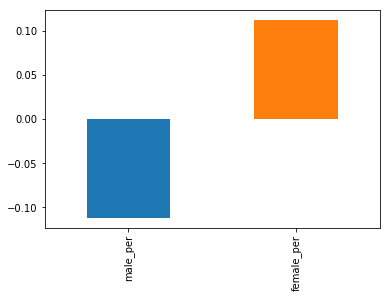

In [48]:
gender_per = ["male_per","female_per"]
combined.corr()["sat_score"][gender_per].plot.bar()

- We can see that a female percentage at a school positivly correlate with SAT score, and male percentage at a school negativly correlate with SAT score, neither correlations is strong.

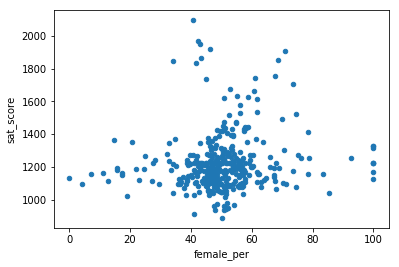

In [49]:
combined.plot.scatter("female_per", "sat_score")

- Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (40 to 80), and high SAT scores

In [50]:
print(combined.loc[(combined["female_per"] > 60) & (combined["sat_score"] > 1700), "SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


- These schools appears to be very selective liberal arts schools that have high academic standards.

## AP Exam Scores vs SAT Scores

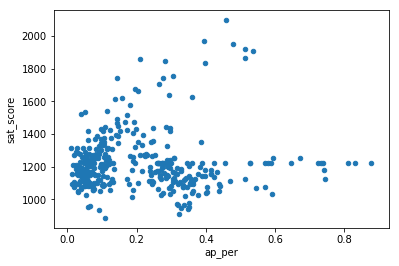

In [51]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]
combined.plot.scatter("ap_per", "sat_score")

- it seems that there is a weak correlation between percentage of AP test takers and the SAT score.

## Plotting class size correlation :

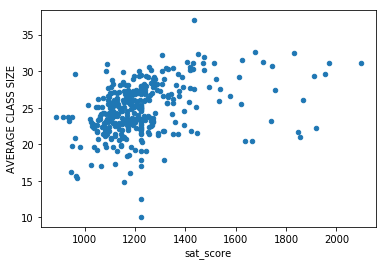

In [52]:
combined.plot.scatter('sat_score', 'AVERAGE CLASS SIZE')

- There is a positive correlation between Class size and SAT score, not a strong one.
- It seems that schools with SAT score higher than 1400 have class size average higher than 20. 

## Best neighborhoods

In [53]:
neighbor = combined.groupby("borough")
neighbor = neighbor.agg(np.mean)
neighbor.reset_index(inplace=True)
neighbor

,borough,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,number_programs,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,ap_per
0,Bronx,384.050714,393.891831,379.655657,1157.598203,96.473842,149.445409,135.694086,136.857093,67.057958,...,1.344086,0.0,0.0,0.0,6.021505,14.225806,2601.752688,1.993330e+06,1.990094e+09,0.189331
1,Brooklyn,391.336947,404.612644,385.414869,1181.364461,131.645682,202.857765,164.940094,183.870968,68.081888,...,1.971698,0.0,0.0,0.0,7.905660,39.047170,856.547170,3.150175e+06,3.037121e+09,0.217670
2,Manhattan,421.070149,437.824710,419.436551,1278.331410,126.135363,192.661966,153.337778,155.421505,74.404992,...,1.433333,0.0,0.0,0.0,6.273161,5.005294,1941.378393,1.094694e+06,1.061305e+09,0.246578
3,Queens,422.274953,448.207556,416.270522,1286.753032,160.463942,238.014423,153.975000,307.208165,72.679629,...,2.390625,0.0,0.0,0.0,7.578125,25.937500,12341.937500,4.226516e+06,4.065923e+09,0.184006
4,Staten Island,457.500000,472.500000,452.500000,1382.500000,228.908654,355.111538,194.435000,450.787097,77.345308,...,5.000000,0.0,0.0,0.0,1.800000,50.000000,6752.500000,5.093752e+06,5.022487e+09,0.176337


- those are the neighborhoods that have the schools with the highest SAT score(ordered from the highest to the lowest) :
    - Staten Island
    - Queens
    - Manhattan
    - Brooklyn
    - Bronx
    
- Now let's import a csv file about property values in NYC and read it in csv. We can find it [Here.](http://us-city.census.okfn.org/entry/newyorkcity/assessment) 

In [54]:
prop = pd.read_csv('pluto_18v2.csv')
prop.head()

C:\Users\Cex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom
0,QN,6087,10,411.0,1099.00,1010.0,26.0,19.0,11361.0,E320,...,NaN,12/06/2018,12/20/2018,12/21/18,12/20/2018,12/21/2018,NaN,NaN,12/20/2018,0106000020E61000000100000001030000000100000005...
1,QN,6092,31,411.0,1097.00,3003.0,26.0,19.0,11361.0,E320,...,NaN,12/06/2018,12/20/2018,12/21/18,12/20/2018,12/21/2018,NaN,NaN,12/20/2018,0106000020E61000000100000001030000000100000005...
2,SI,2450,7501,502.0,277.02,3006.0,31.0,51.0,10314.0,L087,...,NaN,12/06/2018,12/20/2018,12/21/18,12/20/2018,12/21/2018,NaN,NaN,12/20/2018,0106000020E6100000030000000103000000010000001E...
3,BK,6769,94,314.0,546.00,1001.0,22.0,48.0,11210.0,E276,...,NaN,12/06/2018,12/20/2018,12/21/18,12/20/2018,12/21/2018,NaN,NaN,12/20/2018,0106000020E61000000100000001030000000100000005...
4,BK,6770,85,314.0,546.00,1000.0,22.0,48.0,11210.0,E276,...,NaN,12/06/2018,12/20/2018,12/21/18,12/20/2018,12/21/2018,NaN,NaN,12/20/2018,0106000020E61000000100000001030000000100000005...


- We need to select the columns we need the 'borough' and 'assesstot' columns which represent borough's names and their estimated values.

In [55]:
prop = prop.loc[:,['borough','assesstot']]
boro = prop.groupby('borough')
boro = boro.agg(np.mean)
boro.reset_index(inplace=True) 
boro['assesstot'] = round(boro['assesstot'], 2)
boro.sort_values('assesstot')

,borough,assesstot
4,SI,87639.45
3,QN,198363.73
0,BK,214006.11
1,BX,305022.50
2,MN,5408327.35


- Those are the neighborhoods that have the lowest properties's values :

    - Staten Island
    - Queens
    - Brooklyn
    - Bronx
    - Manhattan

- We can conclude that the least expensive neighborhoods that have good schools are respectively Staten Island and Queens. 

## Differences between parent, teacher, and student responses to surveys:

#### Number of respondant and response rate :

In [56]:
n_respondant = ["N_p", "N_t", "N_s"]
resp_rate = ["", "", ]
response_rate = ['rr_s', 'rr_t', 'rr_p']
print(combined[n_respondant].agg(np.sum))
print(combined[response_rate].agg(np.mean))

N_p     89923.000
N_t     14376.000
N_s    217149.625
dtype: float64
rr_s    80.936639
rr_t    83.269972
rr_p    38.947658
dtype: float64


- We can see that students represents almost 68% of the total number of respondant, while parrents and teachers represents respectively 28% and 4%.  
- The response rate is higher for students and teachers, while it's low for parrents.

#### Saftey and Respect scores :

In [57]:
saftey = ["saf_p_11", "saf_t_11", "saf_s_11"]
combined[saftey].agg(np.mean)

saf_p_11    8.182920
saf_t_11    7.144353
saf_s_11    6.611667
dtype: float64

#### Communicatio scores :

In [58]:
com = ["com_p_11", "com_t_11", "com_s_11"]
combined[com].agg(np.mean)

com_p_11    7.619559
com_t_11    6.528375
com_s_11    6.094722
dtype: float64

#### Engagement scores :

In [59]:
eng = ["eng_p_11", "eng_t_11", "eng_s_11"]
combined[eng].agg(np.mean)

eng_p_11    7.517906
eng_t_11    6.990634
eng_s_11    6.620278
dtype: float64

#### Academic expectations scores :

In [60]:
aca = ["aca_p_11", "aca_t_11", "aca_s_11"]
combined[aca].agg(np.mean)

aca_p_11    7.806336
aca_t_11    7.513499
aca_s_11    7.381389
dtype: float64

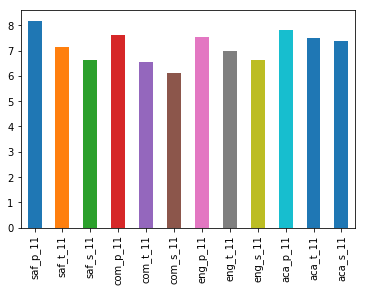

In [61]:
combined [saftey + com + eng + aca].agg(np.mean).plot.bar()

- We can conclude that's scores based on parrent's response are the highest followed by scores based on teacher's response and scores based on student's response are the lowest.

## Assigning scores to schools based on sat_score and other attributes:

- Here are the attributes that can influence the quality of schools :
    - sat_score : We need to convert scores into a (0,...,10) scale .
    - saf_tot_11 : saftey adn respect score
    - com_tot_11 : communication
    - eng_tot_11 : engagement
    - aca_tot_11 : academic expectation

In [62]:
attributes = ['DBN', 'SCHOOL NAME', 'borough', 'sat_score', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11' ]
general_score = combined.loc[:,attributes]
general_score.head()

,DBN,SCHOOL NAME,borough,sat_score,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Manhattan,1122.0,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Manhattan,1172.0,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,Manhattan,1149.0,7.9,7.9,7.9,8.4
3,01M509,MARTA VALLE HIGH SCHOOL,Manhattan,1207.0,6.9,6.2,6.6,7.0
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",Manhattan,1621.0,7.8,6.7,6.9,7.8


#### sat_score:

In [63]:
general_score['conv_sat_score'] = (general_score['sat_score']*10)/2400

- Now we can select the converted attribute's score, then calculate the mean.

In [64]:
survey = ['saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']
general_score['avg_survey_score'] = general_score[survey].mean(axis=1)
conv_attributes = ['DBN', 'SCHOOL NAME', 'borough','conv_sat_score', 'avg_survey_score']
school_score = general_score.loc[:, conv_attributes]
school_score.head()

,DBN,SCHOOL NAME,borough,conv_sat_score,avg_survey_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Manhattan,4.675000,6.625
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Manhattan,4.883333,6.750
2,01M450,EAST SIDE COMMUNITY SCHOOL,Manhattan,4.787500,8.025
3,01M509,MARTA VALLE HIGH SCHOOL,Manhattan,5.029167,6.675
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",Manhattan,6.754167,7.300


In [65]:
conv_att = ['conv_sat_score', 'avg_survey_score']
school_score['SCORE'] = round(school_score[conv_att].mean(axis=1),2)
school_score.sort_values('SCORE', ascending = False)

,DBN,SCHOOL NAME,borough,conv_sat_score,avg_survey_score,SCORE
356,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,Staten Island,8.137500,8.275,8.21
155,10X696,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,Bronx,8.000000,8.225,8.11
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,Manhattan,7.733333,8.200,7.97
37,02M475,STUYVESANT HIGH SCHOOL,Manhattan,8.733333,7.150,7.94
302,25Q525,TOWNSEND HARRIS HIGH SCHOOL,Queens,7.958333,7.525,7.74
79,05M692,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",Manhattan,7.695833,7.700,7.70
26,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,Manhattan,7.325000,8.025,7.68
327,28Q687,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,Queens,7.783333,7.400,7.59
151,10X445,BRONX HIGH SCHOOL OF SCIENCE,Bronx,8.204167,6.950,7.58
198,14K449,"BROOKLYN LATIN SCHOOL, THE",Brooklyn,7.250000,7.875,7.56
